# JSC270 Assignment 3

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple

## Part 1: Approximating $\pi$

**a) Suppose you can only generate pairs of uniform random numbers between 0 and 1 (i.e. points within a unit square centered at (1/2, 1/2)). Describe a method to approximate $\pi$ by generating many pairs of these uniform random numbers. Implement your method in your notebook to obtain an estimate of $\pi$.**

In [27]:
np.random.seed(270) # Set seed for reproducibility
n = 1000000 # Set the number of simulations
d = np.zeros(n) # Initialize the array
o = np.array([0.5, 0.5]) # Fix the origin

for i in range(n):
    p = np.random.rand(2) # Generate a pair within the unit square
    d[i] = (np.linalg.norm(p - o)) # Compute and add the distance to the initialized array

In [31]:
pi_hat = len(d[d <= 0.5]) / n * 4 # Compute pi approximation
pi_hat

3.143524

**b) How many pairs of uniform numbers did you generate in your implementation from (a) and why?  How close is your estimate to $\pi$?**

In [32]:
pi_hat - np.pi

0.001931346410207091

In [34]:
import seaborn as sns

## Part 2: Understand Bias

**a) Run a simulation to compare the bias of the above two estimators for $\sigma^2$ in your notebook. Specifically, consider sample sizes of $n = 10, 25, 50, 100, 250, 500$. For each sample size, generate the $n$ samples independently from a normal distribution with mean $2$ and standard deviation $2$ and compute both estimators. Repeat this process 1000 times for each sample size. With the 1000 estimates, compute the bias of both estimators for $\sigma^2$ for each sample size.**

In [57]:
## Define variance estimators
def variance_estimators(sample: np.array) -> Tuple[float, float]:
    n = len(sample) # Define sample size
    sample_variance = 0 # Initialize return value
    sample_mean = np.mean(sample) # Compute sample mean
    for num in sample:
        sample_variance += (num - sample_mean) ** 2 # Compute squared difference
    return sample_variance / (n - 1), sample_variance / n

In [60]:
sample_sizes = [10, 25, 50, 100, 250, 500] # Set sample sizes
np.random.seed(270) # Set seed for reproducibility
true_variance = 4 # Since std = 2, var = 4
bias1, bias2 = [], [] # Initialize bias lists

for n in sample_sizes: # Run simulation for all sample sizes
    sample_variances1, sample_variances2 = np.zeros(1000), np.zeros(1000) # Initialize arrays to hold sample variance estimates
    for i in range(1000): # Run simulation 1000 times for each sample size
        sample = np.random.normal(2, 2, n) # Generate n normal data
        variance_estimate1, variance_estimate2 = variance_estimators(sample) # Compute sample variances
        sample_variances1[i] = variance_estimate1 # Record estimate in array
        sample_variances2[i] = variance_estimate2 # Record estimate in array
        
    sample_bias1 = np.mean(sample_variances1) - true_variance # Compute bias for estimator 1
    sample_bias2 = np.mean(sample_variances2) - true_variance # Compute bias for estimator 2
    bias1.append(sample_bias1) # Record sample bias
    bias2.append(sample_bias2) # Record sample bias

**b) Make a plot of bias vs. sample size for the two estimators. What do you observe? Is this behavior expected?**

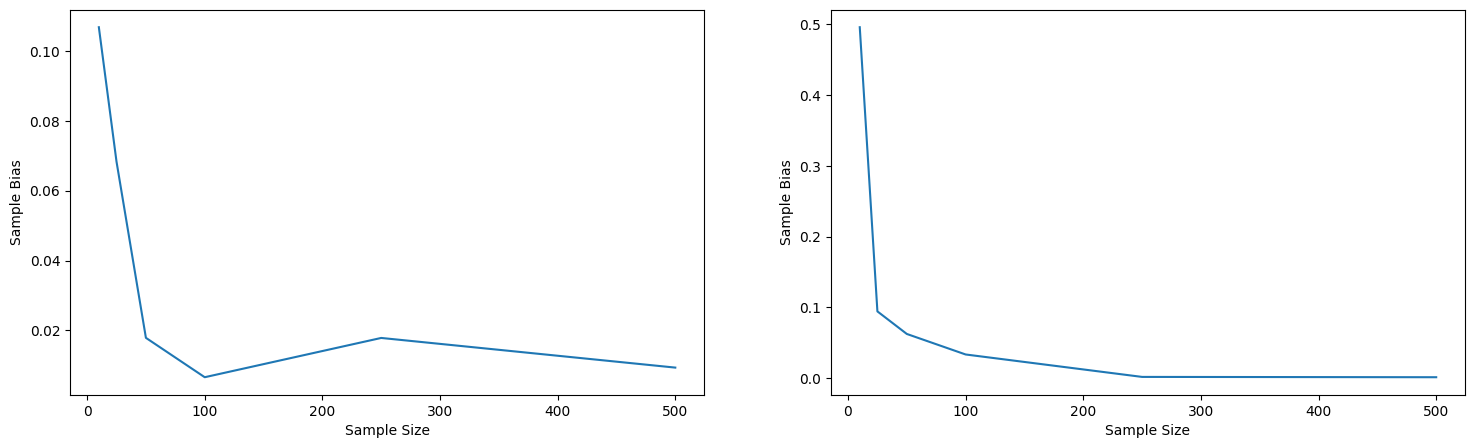

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5)) # Define grid for plots

## Create line plot for estimator 1
sns.lineplot(x=sample_sizes, y=np.abs(bias1), ax=ax1)
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Sample Bias')

## Create line plot for estimator 2
sns.lineplot(x=sample_sizes, y=np.abs(bias2), ax=ax2)
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Sample Bias')

plt.show()